In [ ]:
! git clone https://github.com/sameerbairwa/ANPR

In [1]:
from os import chdir as cd
cd('/Users/nebula/Desktop/company/roboflow/licencePlate/ANPR')

### Number Plate detection

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from local_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob

In [3]:
def load_model(path):
    try:
        path = splitext(path)[0]
        with open('%s.json' % path, 'r') as json_file:
            model_json = json_file.read()
        model = model_from_json(model_json, custom_objects={})
        model.load_weights('%s.h5' % path)
        print("Loading model successfully...")
        return model
    except Exception as e:
        print(e)
wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)

Loading model successfully...


In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
def preprocess_image(path):
    img = cv2.imread(path)
    # converting BGR to RGB
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #normalise to 0 to 1
    pixels = image_rgb.astype('float32')
    pixels /= 255.0
    # image_rgb = image_rgb.resize((224, 224))
    return pixels

In [5]:
import os
def toSave(t_imagePath,f_name):
    
  # directory= '/content/drive/MyDrive/Project/detectCrop/imagesCar/numberPlate/'
    def get_plate(image_path, Dmax=608, Dmin=360):
        vehicle = preprocess_image(image_path)
        ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
        side = int(ratio * Dmin)
        bound_dim = min(side, Dmax)
        _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
        return LpImg, cor# Obtain plate image and its coordinates from an image
    test_image = t_imagePath
    LpImg,cor = get_plate(test_image)
    print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
    print("Coordinate of plate(s) in image: \n", cor)# Visualize our result
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.axis(False)
    plt.imshow(preprocess_image(test_image))
    plt.subplot(1,2,2)
    plt.axis(False)
    plt.imshow(LpImg[0])
    # plt.savefig("/content/drive/MyDrive/Project/detectCrop/imagesCar/numberPlate/part_result_29.jpg",dpi=300)
    os.chdir(directory)
    filename = f_name
    crop_img = np.array(255*LpImg[0], dtype = 'uint8')
    #cv2_imshow(crop_img)
    cv2.imwrite(filename,crop_img)

/Users/nebula/Desktop/company/roboflow/licencePlate/img/KL-08.jpg
Detect 1 plate(s) in KL-08
Coordinate of plate(s) in image: 
 [array([[161.46913258, 293.76977973, 292.62663091, 160.32598375],
       [188.16006433, 178.66312718, 207.27615533, 216.77309248],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/img/WB-3.1.jpg
Detect 1 plate(s) in WB-3.1
Coordinate of plate(s) in image: 
 [array([[108.07404023, 209.97105166, 210.3832082 , 108.48619677],
       [141.02768663, 141.38556849, 164.90622847, 164.54834661],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/img/89.jpg
Detect 1 plate(s) in 89
Coordinate of plate(s) in image: 
 [array([[ 29.42746527,  79.79749423,  80.34990976,  29.9798808 ],
       [119.71334897, 127.80217907, 143.31500722, 135.22617712],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/comp

/Users/nebula/opt/anaconda3/envs/licencePlate/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


Detect 1 plate(s) in 10
Coordinate of plate(s) in image: 
 [array([[116.88771057, 167.26733261, 168.72062588, 118.34100384],
       [141.77249559, 140.64550348, 156.09706425, 157.22405636],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/img/35.jpg
Detect 1 plate(s) in 35
Coordinate of plate(s) in image: 
 [array([[105.70011763, 184.09751856, 185.13727925, 106.73987832],
       [233.2003546 , 227.05388566, 242.99441339, 249.14088233],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/img/BR-15.jpg
Detect 1 plate(s) in BR-15
Coordinate of plate(s) in image: 
 [array([[104.76614119, 243.52513177, 245.16294609, 106.40395551],
       [318.82753325, 302.96852741, 331.9590581 , 347.81806394],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/img/VM 75.jpg
Detect 2 plate(s) in VM 75
Coor

Detect 1 plate(s) in 45
Coordinate of plate(s) in image: 
 [array([[ 80.44518104, 173.83259188, 175.3602796 ,  81.97286876],
       [274.05943458, 278.80906058, 294.00161606, 289.25199005],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/img/1.jpg
Detect 1 plate(s) in 1
Coordinate of plate(s) in image: 
 [array([[ 86.17885621, 226.23170022, 213.82186493,  73.76902091],
       [333.36178627, 339.98491862, 355.63564836, 349.01251601],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/img/90.jpg
Detect 1 plate(s) in 90
Coordinate of plate(s) in image: 
 [array([[125.18124563, 167.53565609, 168.21209977, 125.85768931],
       [278.39765357, 277.95639617, 294.51139611, 294.9526535 ],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]
/Users/nebula/Desktop/company/roboflow/licencePlate/img/DN-1.jpg
Detect 1 plate(s) in DN-1
Coordinate of 

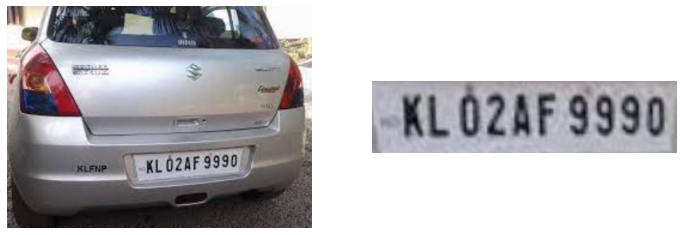

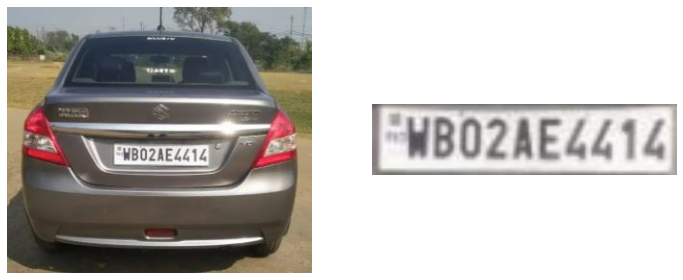

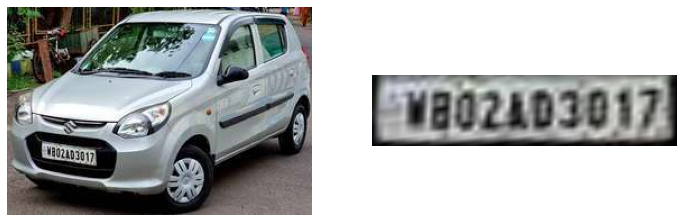

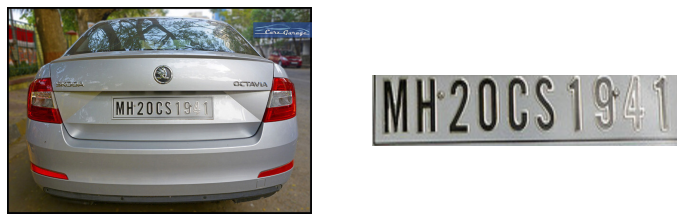

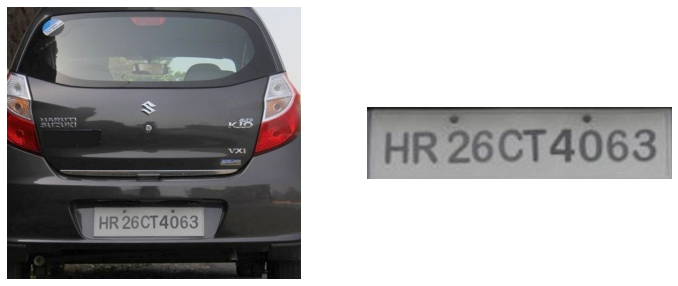

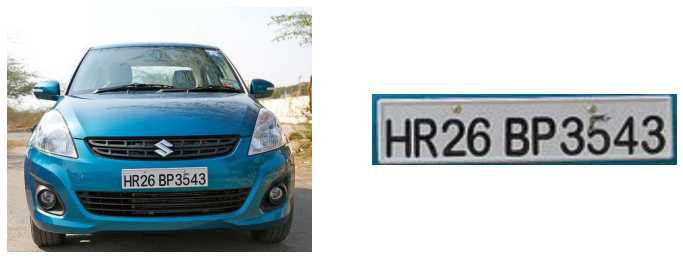

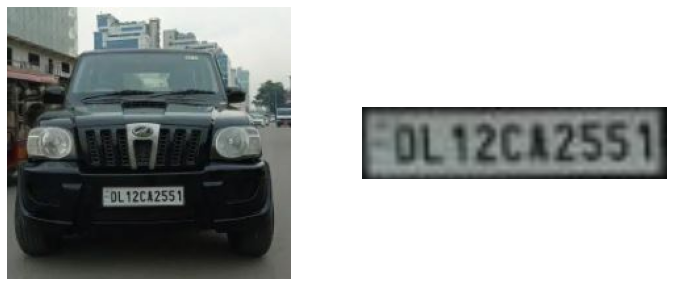

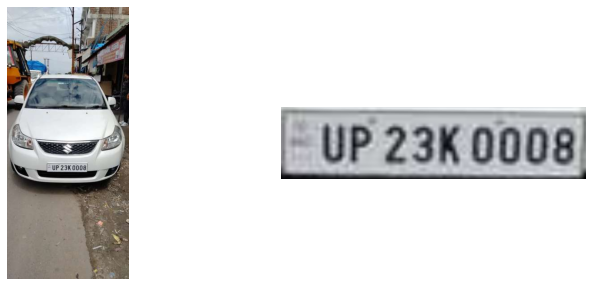

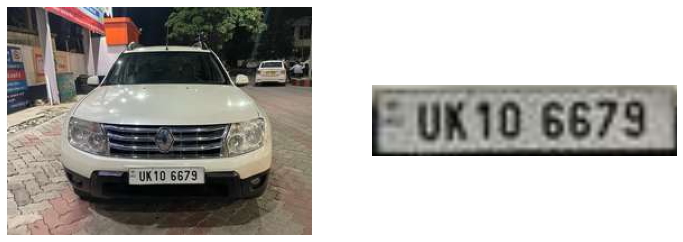

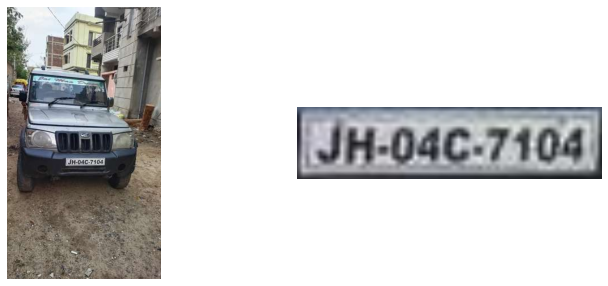

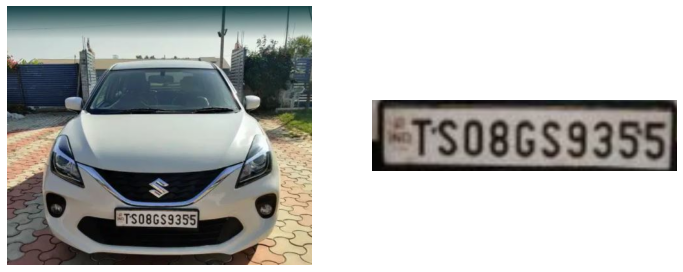

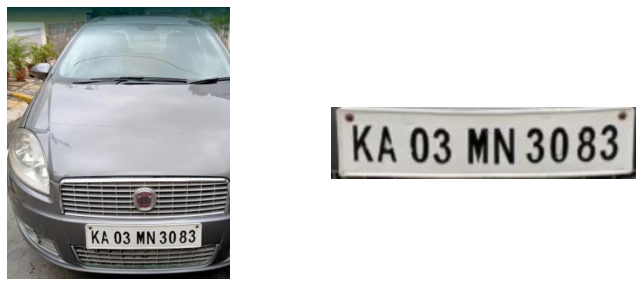

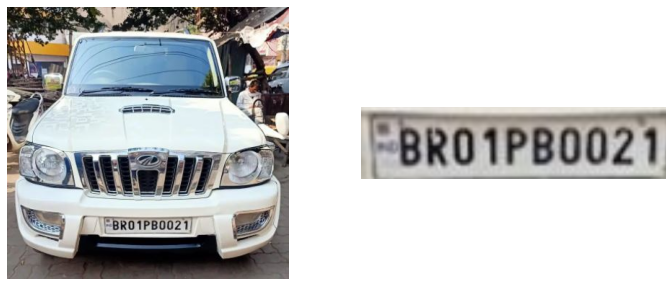

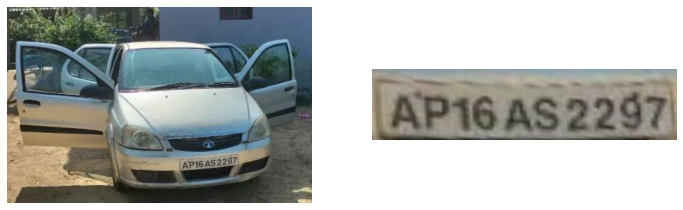

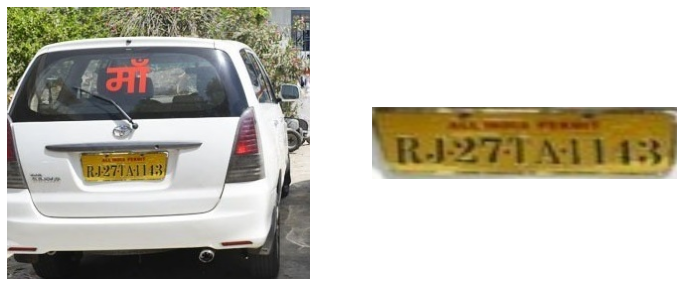

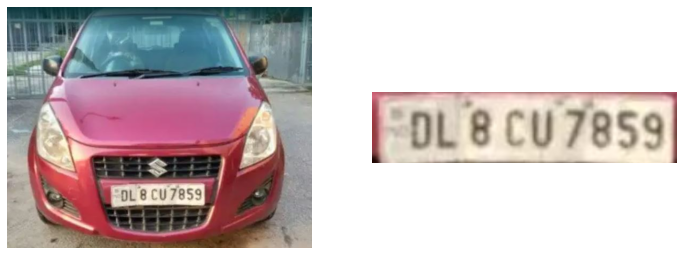

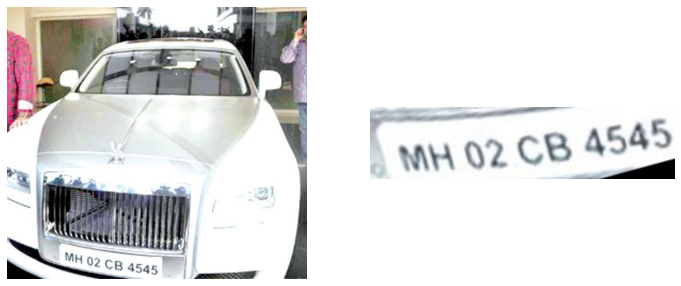

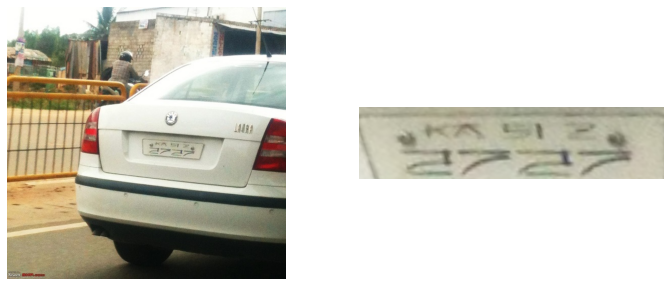

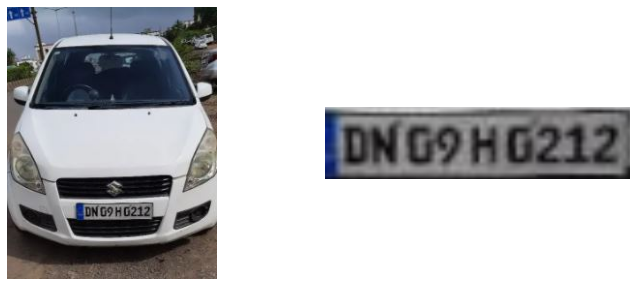

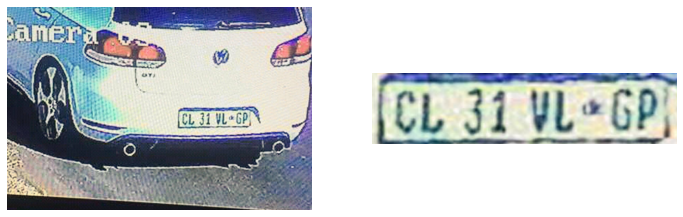

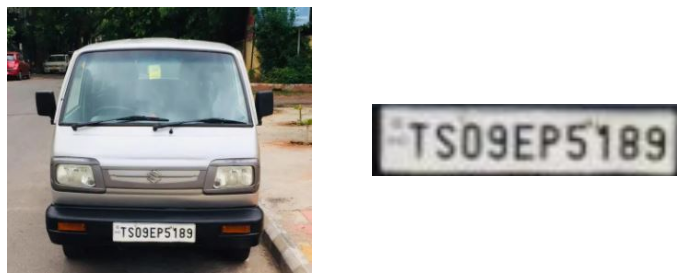

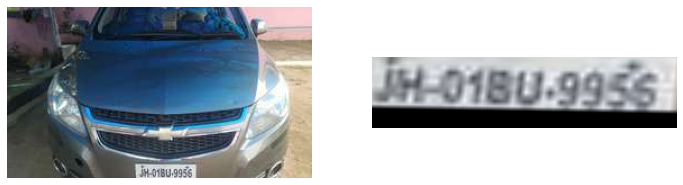

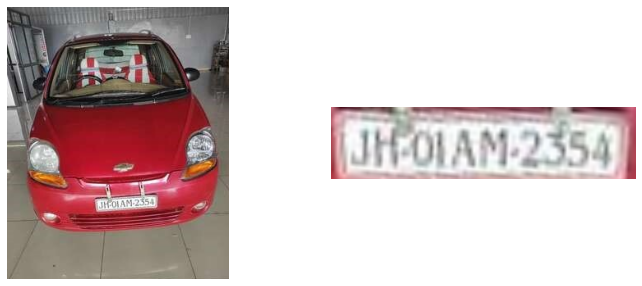

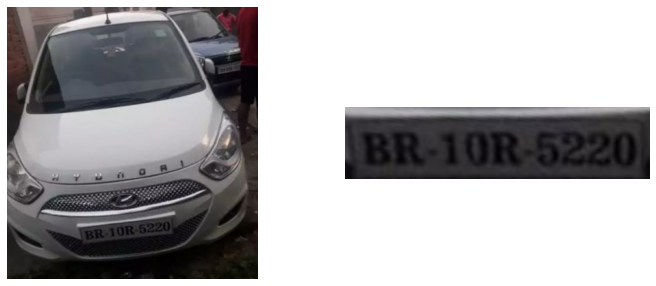

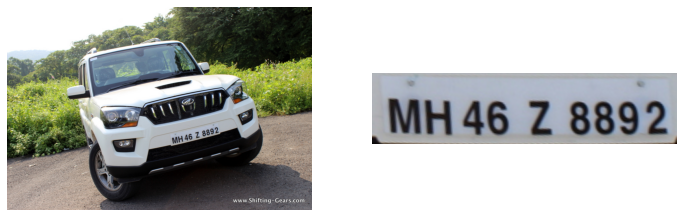

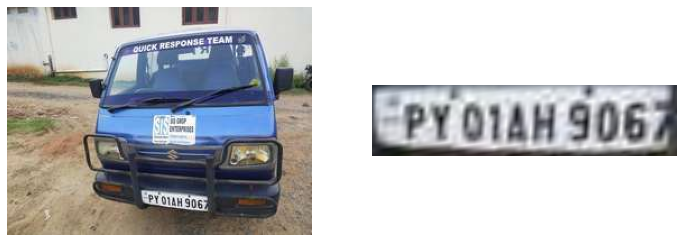

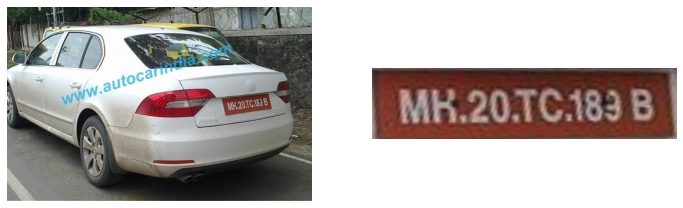

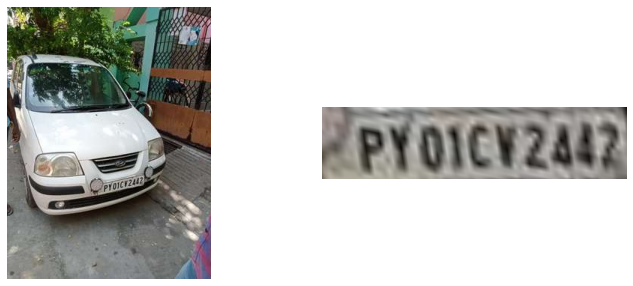

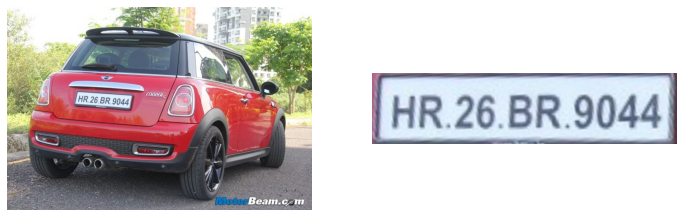

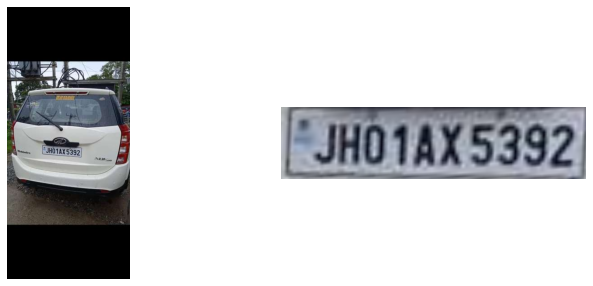

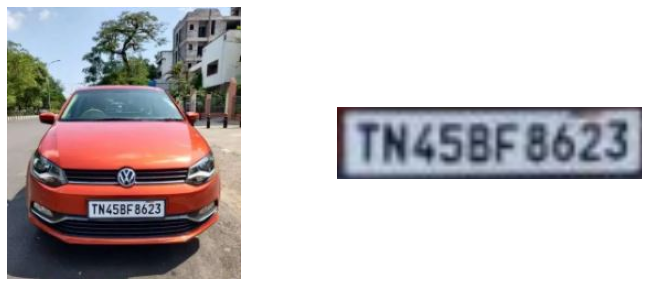

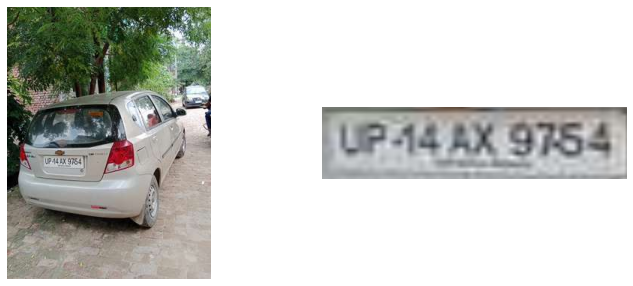

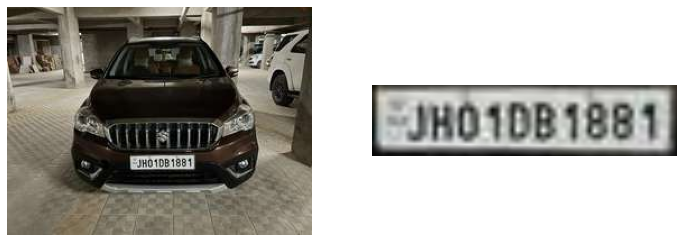

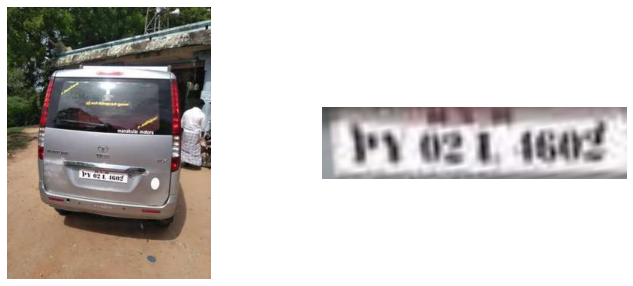

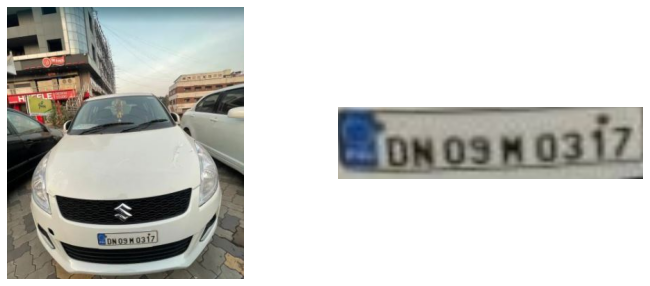

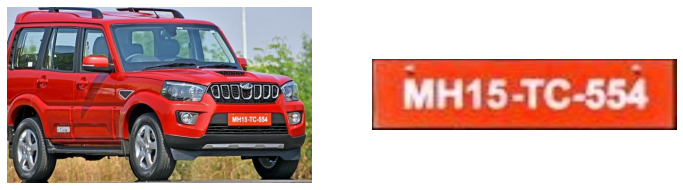

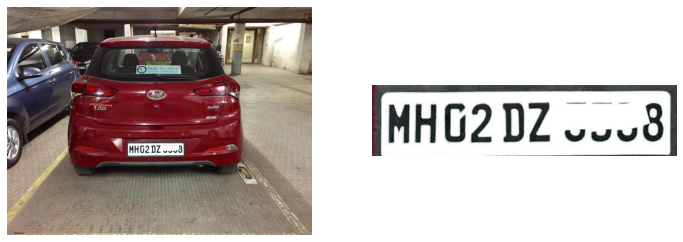

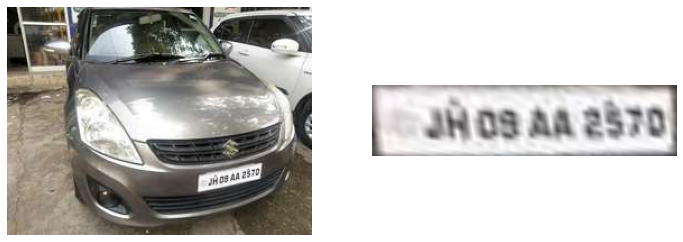

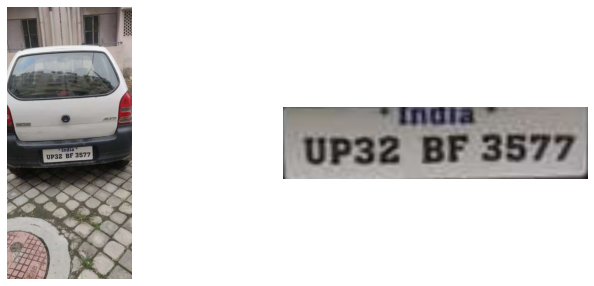

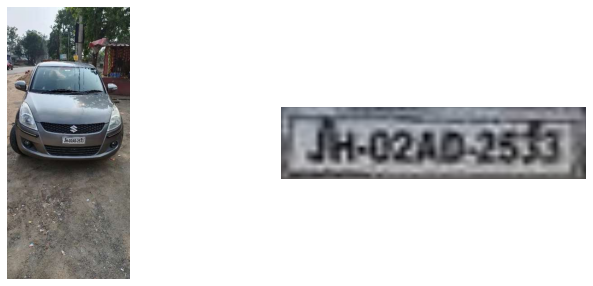

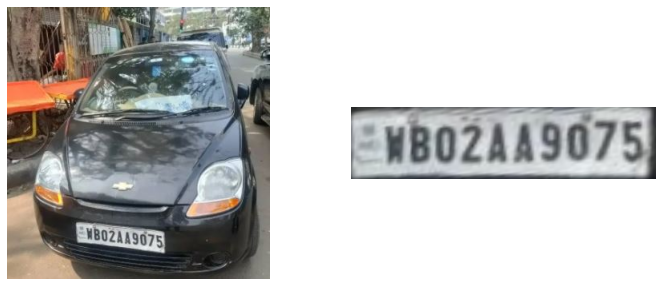

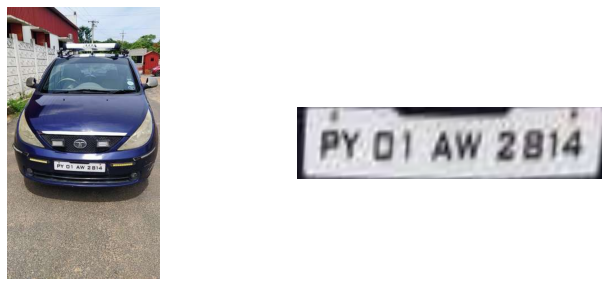

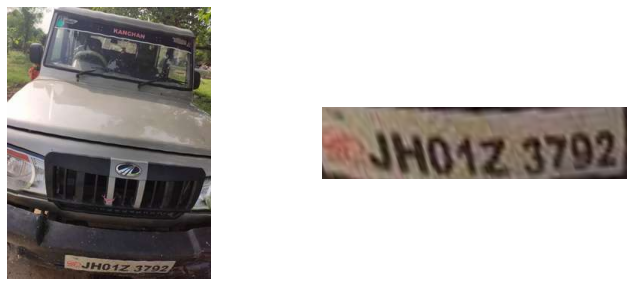

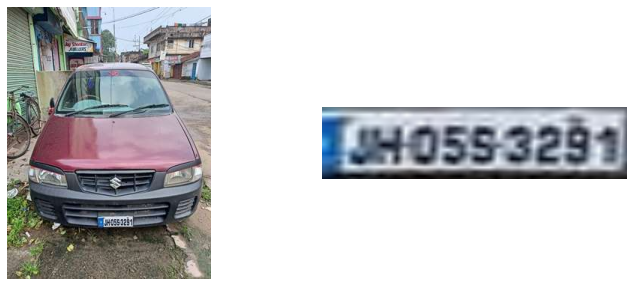

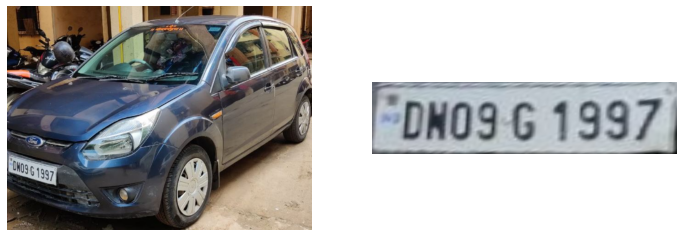

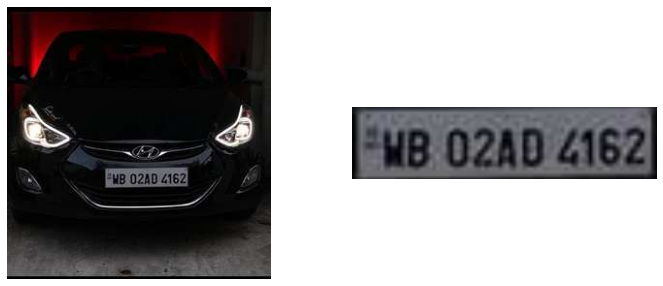

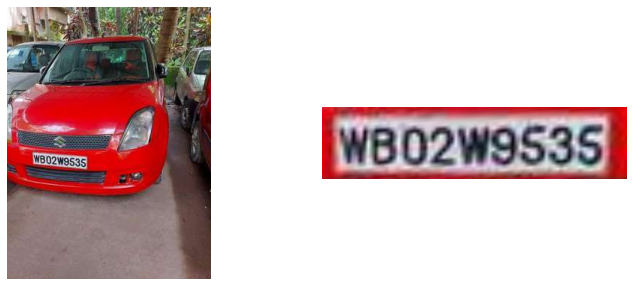

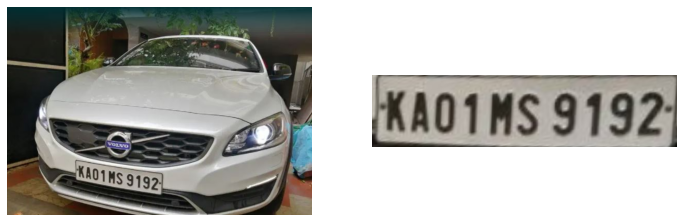

In [6]:
import os
import numpy as np
import glob
import cv2
#from google.colab.patches import cv2_imshow

directory = r'/Users/nebula/Desktop/company/roboflow/licencePlate/plates/' #saving the number plate directory
count = 0
for file in glob.glob("/Users/nebula/Desktop/company/roboflow/licencePlate/img/*.jpg"):# your image path
    # img=cv2.imread(file)
    os.chdir(directory)
    print(file)
    # blur_image = cv2.GaussianBlur(img, (11,11),0)
    filename = '000'+str(count)+'.jpg'
    toSave(file,filename)
    # cv2.imwrite(filename, result)
    count= count+1

## bounding boxes

In [8]:
from os import chdir as cd
cd('/Users/nebula/Desktop/company/roboflow/licencePlate/Char_temp')

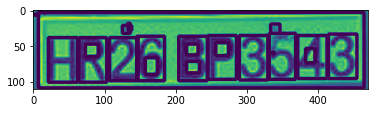

In [9]:
import cv2
import numpy as np
# from google.colab.patches import cv2_imshow
im = cv2.imread('/Users/nebula/Desktop/company/roboflow/licencePlate/plates/0005.jpg',0)# number plate after detection
ret,thresh1 = cv2.threshold(im,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	#bound the images
	cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),3)
i=0
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	#following if statement is to ignore the noises and save the images which are of normal size(character)
	#In order to write more general code, than specifying the dimensions as 100,
	# number of characters should be divided by word dimension
	# if w>128 and h>128:
		#save individual images
	cv2.imwrite(str(i)+".jpg",thresh1[y:y+h,x:x+w])
	i=i+1
# cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
plt.imshow(im)

## Segregate Part

In [10]:
from os import chdir as cd
cd('/Users/nebula/Test/licencePlate/segregateData')

In [ ]:
!pip install pytesseract

In [11]:
def cleanup_text(text):
  # strip out non-ASCII text so we can draw the text on the image
  # using OpenCV
    return "".join([c if ord(c)<128 else "" for c in text]).strip()

In [12]:
c_0 = 0
c_1 = 0
c_2 = 0
c_3 = 0
c_4 = 0
c_5 = 0
c_6 = 0
c_7 = 0
c_8 = 0
c_9 = 0
c_A = 0
c_B = 0
c_C = 0
c_D = 0
c_E = 0
c_F = 0
c_G = 0
c_H = 0
c_I = 0
c_J = 0
c_K = 0
c_L = 0
c_M = 0
c_N = 0
c_O = 0
c_P = 0
c_Q = 0
c_R = 0
c_S = 0
c_T = 0
c_U = 0
c_V = 0
c_W = 0
c_X = 0
c_Y = 0
c_Z = 0

In [13]:
import os


# c_0=0
# temp = c0

def num0():
    global c_0
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az0/'
    os.chdir(directory)
    filename = str(c_0).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_0 = c_0 +1
  # return "monday"
def num1():
    global c_1
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az1/'
    os.chdir(directory)
    filename = str(c_1).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_1= c_1+1
    # return "tuesday"
def num2():
    global c_2
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az2/'
    os.chdir(directory)
    filename = str(c_2).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_2= c_2+1
    # return "wednesday"
def num3():
    global c_3
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az3/'
    os.chdir(directory)
    filename = str(c_3).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_3= c_3+1
    # return "thursday"
def num4():
    global c_4
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az4/'
    os.chdir(directory)
    filename = str(c_4).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_4= c_4+1
    # return "friday"
def num5():
    global c_5
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az5/'
    os.chdir(directory)
    filename = str(c_5).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_5= c_5+1
    # return "saturday"
def num6():
    global c_6
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az6/'
    os.chdir(directory)
    filename = str(c_6).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_6= c_6+1
    # return "sunday"
def num7():
    global c_7
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az7/'
    os.chdir(directory)
    filename = str(c_7).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_7= c_7+1
    # return "monday"
def num8():
    global c_8
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az8/'
    os.chdir(directory)
    filename = str(c_8).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_8= c_8+1
    # return "tuesday"
def num9():
    global c_9
    directory = r'/Users/nebula/Test/licencePlate/segregateData/Az9/'
    os.chdir(directory)
    filename = str(c_9).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_9= c_9+1
    # return "wednesday"
def numA():
    global c_A
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzA/'
    os.chdir(directory)
    filename = str(c_A).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_A= c_A+1
    # return "thursday"
def numB():
    global c_B
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzB/'
    os.chdir(directory)
    filename = str(c_B).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_B= c_B+1
    # return "friday"
def numC():
    global c_C
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzC/'
    os.chdir(directory)
    filename = str(c_C).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_C= c_C+1
    # return "saturday"
def numD():
    global c_D
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzD/'
    os.chdir(directory)
    filename = str(c_D).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_D= c_D+1
    # return "sunday"
def numE():
    global c_E
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzE/'
    os.chdir(directory)
    filename = str(c_E).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_E= c_E+1
    # return "monday"
def numF():
    global c_F
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzF/'
    os.chdir(directory)
    filename = str(c_F).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_F= c_F+1
    # return "tuesday"
def numG():
    global c_G
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzG/'
    os.chdir(directory)
    filename = str(c_G).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_G= c_G+1
    # return "wednesday"
def numH():
    global c_H
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzH/'
    os.chdir(directory)
    filename = str(c_H).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_H= c_H+1
    # return "thursday"
def numI():
    global c_I
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzI/'
    os.chdir(directory)
    filename = str(c_I).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_I= c_I+1
    # return "friday"
def numJ():
    global c_J
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzJ/'
    os.chdir(directory)
    filename = str(c_J).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_J= c_J+1
    # return "saturday"
def numK():
    global c_K
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzK/'
    os.chdir(directory)
    filename = str(c_K).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_K= c_K+1
    # return "sunday"
def numL():
    global c_L
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzL/'
    os.chdir(directory)
    filename = str(c_L).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_L= c_L+1
    # return "monday"
def numM():
    global c_M
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzM/'
    os.chdir(directory)
    filename = +str(c_M).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_M= c_M+1
    # return "tuesday"
def numN():
    global c_N
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzN/'
    os.chdir(directory)
    filename = str(c_N).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_N= c_N+1
    # return "wednesday"
def numO():
    global c_O
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzO/'
    os.chdir(directory)
    filename = str(c_O).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_O= c_O+1
    # return "thursday"
def numP():
    global c_P
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzP/'
    os.chdir(directory)
    filename = str(c_P).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_P= c_P+1
    # return "friday"
def numQ():
    global c_Q
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzQ/'
    os.chdir(directory)
    filename = str(c_Q).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_Q= c_Q+1
    # return "saturday"
def numR():
    global c_R
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzR/'
    os.chdir(directory)
    filename = str(c_R).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_R= c_R+1
    # return "sunday"
def numS():
    global c_S
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzS/'
    os.chdir(directory)
    filename = str(c_S).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_S= c_S+1
    # return "monday"
def numT():
    global c_T
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzT/'
    os.chdir(directory)
    filename = str(c_T).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_T= c_T+1
    # return "tuesday"
def numU():
    global c_U
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzU/'
    os.chdir(directory)
    filename = str(c_U).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_U= c_U+1
    # return "wednesday"
def numV():
    global c_V
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzV/'
    os.chdir(directory)
    filename = str(c_V).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_V= c_V+1
    # return "thursday"
def numW():
    global c_W
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzW/'
    os.chdir(directory)
    filename = str(c_W).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_W= c_W+1
    # return "friday"
def numX():
    global c_X
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzX/'
    os.chdir(directory)
    filename = str(c_X).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_X= c_X+1
    # return "saturday"
def numY():
    global c_Y
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzY/'
    os.chdir(directory)
    filename = str(c_Y).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_Y= c_Y+1
    # return "sunday"
def numZ():
    global c_Z
    directory = r'/Users/nebula/Test/licencePlate/segregateData/AzZ/'
    os.chdir(directory)
    filename = str(c_Z).zfill(3)+'.jpg'
    ima=cv2.resize(img, (28,28))
    invert = cv2.bitwise_not(ima)
    cv2.imwrite(filename, invert)
    c_Z= c_Z+1
    # return "sunday"
def default():
  # break()
    return "Incorrect"

switcher = {
    "0": num0,
    "1": num1,
    "2": num2,
    "3": num3,
    "4": num4,
    "5": num5,
    "6": num6,
    "7": num7,
    "8": num8,
    "9": num9,
    "A": numA,
    "B": numB,
    "C": numC,
    "D": numD,
    "E": numE,
    "F": numF,
    "G": numG,
    "H": numH,
    "I": numI,
    "J": numJ,
    "K": numK,
    "L": numL,
    "M": numM,
    "N": numN,
    "O": numO,
    "P": numP,
    "Q": numQ,
    "R": numR,
    "S": numS,
    "T": numT,
    "U": numU,
    "V": numV,
    "W": numW,
    "X": numX,
    "Y": numY,
    "Z": numZ
    }

def switch(alphanum):
    return switcher.get(alphanum, default)()

# print(switch("A"))
# print(switch(5))

In [14]:
import os
import numpy as np
import glob
import cv2
import pytesseract
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
#from google.colab.patches import cv2_imshow

# directory = r'/content/drive/MyDrive/Project/segregateChar/Z/'
# count = 0
for file in glob.glob("/Users/nebula/Desktop/company/roboflow/licencePlate/Char_temp/*.jpg"):
    img=cv2.imread(file)

    # Adding custom options
    custom_config = r'--oem 3 --psm 6'
    text=pytesseract.image_to_string(img, config=custom_config)
    cText=cleanup_text(text)
    print(cText)
    switch(cText)
  # if cText == '0':
  # os.chdir(directory)
  # blur_image = cv2.GaussianBlur(img, (11,11),0)
  # filename = '00'+str(count)+'.jpg'
  # cv2.imwrite(filename, img)
  # count= count+1


6
i.
5
3
3
4
H
B
2?
R


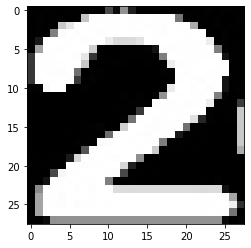

In [15]:
filename = '/Users/nebula/Desktop/company/roboflow/licencePlate/Char_temp/2.jpg'
img = cv2.imread(filename)
ima=cv2.resize(img, (28,28))
invert = cv2.bitwise_not(ima)
cv2.imwrite('/Users/nebula/Test/licencePlate/segregateData/Az2/19.jpg', invert)
plt.imshow(invert)